In [ ]:
# Loan Application Status Prediction Project

In [ ]:
A Loan Status Prediction system is a machine learning model or application that predicts whether a loan application will be approved or rejected based on various input features and historical data. The system aims to automate the loan approval process and assist in making informed decisions by assessing the creditworthiness of applicants.

The Loan Status Prediction system typically utilizes a dataset that includes information about loan applicants, such as personal details (gender, age, marital status), financial information (income, debt obligations), credit history (credit score, repayment history), employment details, and other relevant factors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [37]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv")

In [38]:
df.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [42]:
header_names=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant_Income','CoapplicantIncome','LoanAmount','LoanAmountTerm','Credit History','Property_Area','Loan_Status']
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv",header=None,skiprows=1,names=header_names)

In [44]:
df.head(51)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,CoapplicantIncome,LoanAmount,LoanAmountTerm,Credit History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
6,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
7,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
8,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
9,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [48]:
df.shape

(613, 13)

In [49]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
608  LP002978  Female      No          0      Graduate            No   
609  LP002979    Male     Yes         3+      Graduate            No   
610  LP002983    Male     Yes          1      Graduate            No   
611  LP002984    Male     Yes          2      Graduate            No   
612  LP002990  Female      No          0      Graduate           Yes   

     Applicant_Income  CoapplicantIncome  LoanAmount  LoanAmountTerm  \
0                4583          

In [51]:
df.describe()

,Applicant_Income,CoapplicantIncome,LoanAmount,LoanAmountTerm,Credit History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [52]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant_Income      0
CoapplicantIncome     0
LoanAmount           21
LoanAmountTerm       14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Analysis and Visualization

<Axes: >

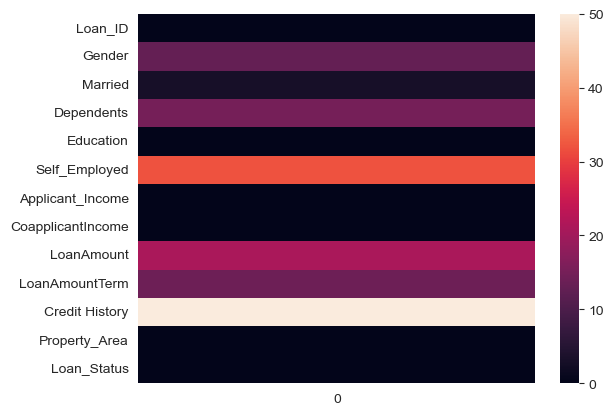

In [46]:
sns.heatmap(df.isnull().sum().to_frame())

<Axes: xlabel='Education', ylabel='count'>

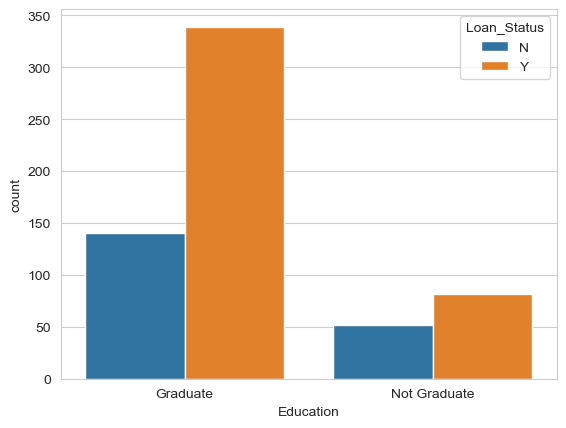

In [53]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

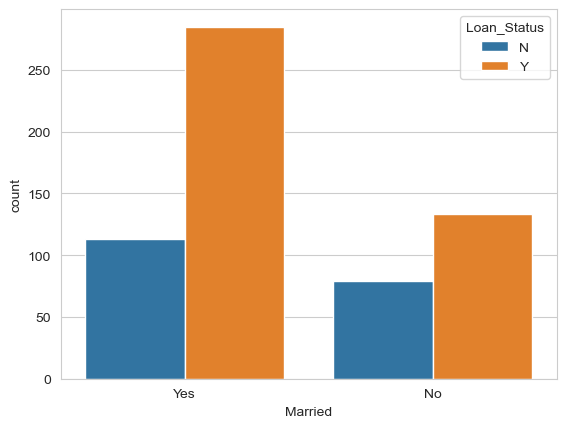

In [55]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

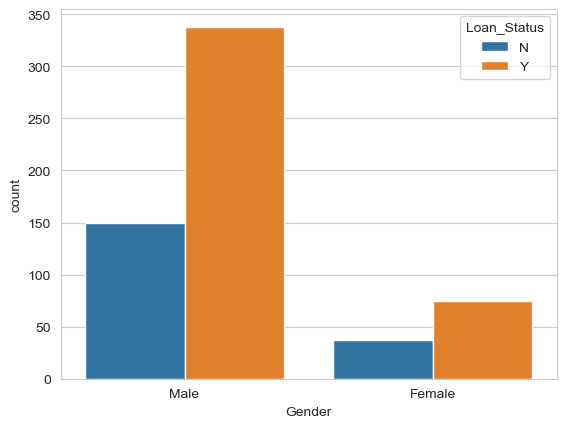

In [56]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

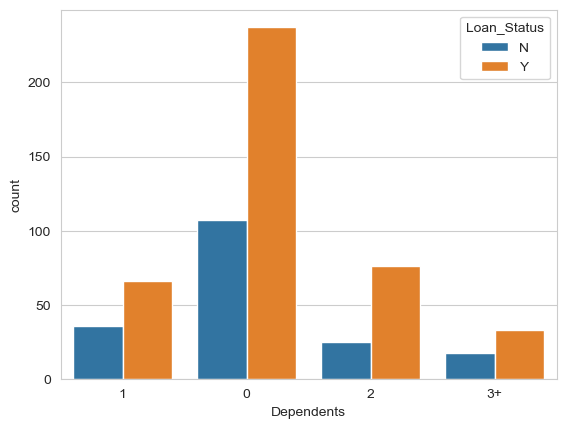

In [57]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<Axes: xlabel='Applicant_Income', ylabel='count'>

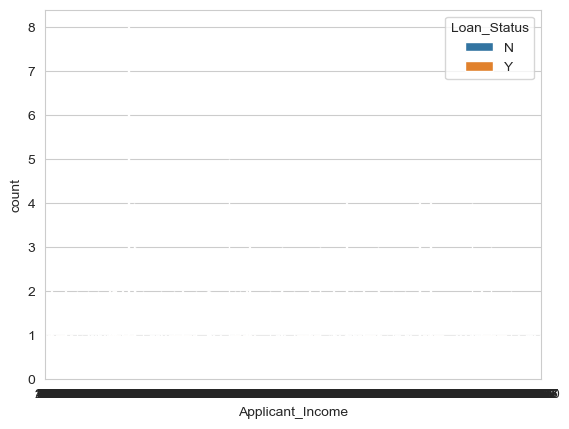

In [59]:
sns.countplot(x='Applicant_Income',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

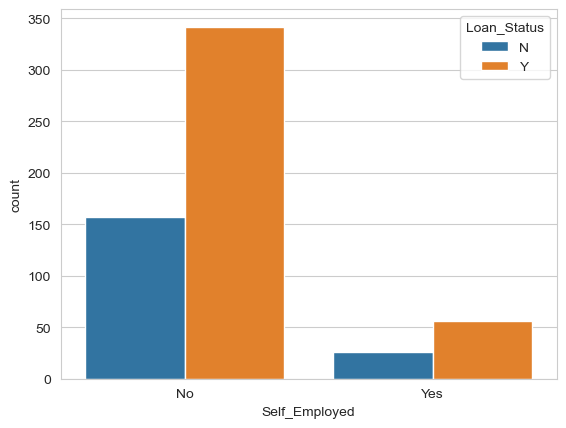

In [61]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='CoapplicantIncome', ylabel='count'>

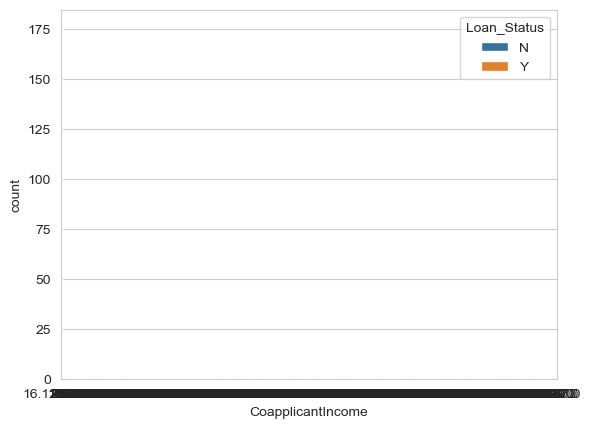

In [62]:
sns.countplot(x='CoapplicantIncome',hue='Loan_Status',data=df)

<Axes: xlabel='LoanAmount', ylabel='count'>

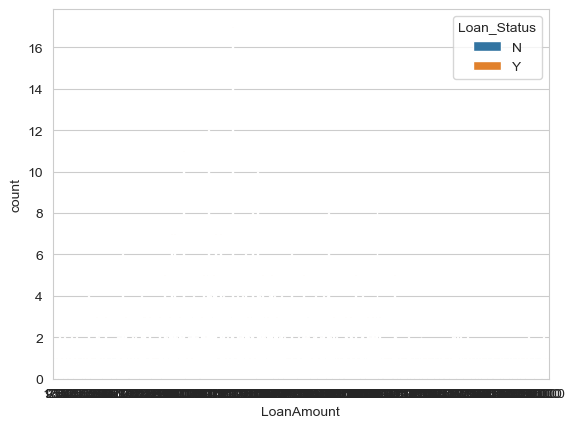

In [63]:
sns.countplot(x='LoanAmount',hue='Loan_Status',data=df)

<Axes: xlabel='LoanAmountTerm', ylabel='count'>

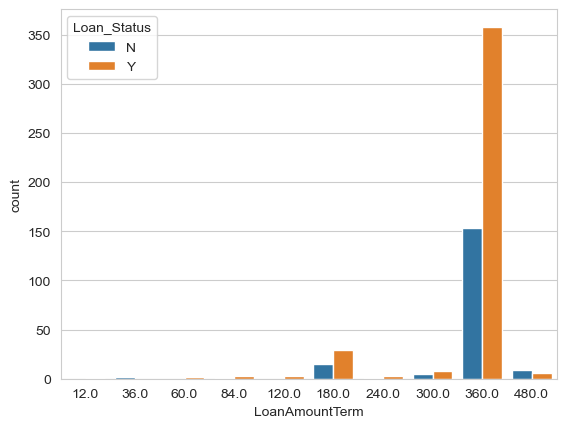

In [64]:
sns.countplot(x='LoanAmountTerm',hue='Loan_Status',data=df)

In [ ]:
:) 

<Axes: xlabel='Credit History', ylabel='count'>

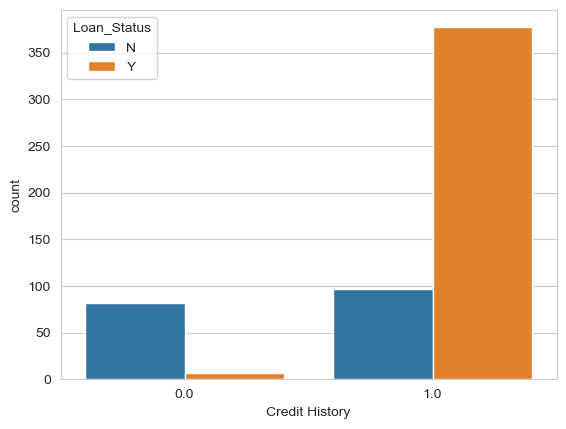

In [67]:
sns.countplot(x='Credit History',hue='Loan_Status',data=df)

In [ ]:
:) If credit history is good then there is more chances of getting loan approved.

<Axes: xlabel='Property_Area', ylabel='count'>

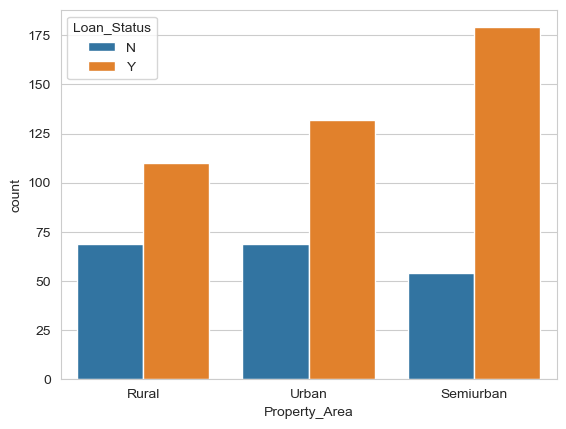

In [70]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

In [ ]:
:) There is likely to be more chances of getting loan approved in SemiUrban Area and there is likely to be less chances of getting loan approved in Rural Areas.